In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing os module
import os
import numpy as np
from PIL import Image
from numpy import asarray
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [ ]:
#Function to convert images to array
def img_to_array(emotion):
    #first_two = emotion[0:2]
    x = []
    y = []
    #x.append([])
    #x[0].append([])
    folder = "/content/drive/My Drive/archive/"+emotion
    for count, filename in enumerate(os.listdir(folder)):
        # load the image
        img = Image.open(f"{folder}/{filename}")
        # Resize the image
        img = img.resize((48, 48))
        # asarray() class is used to convert
        # PIL images into NumPy arrays
        img_data = image.img_to_array(img)
        #img_data = img_data.reshape(-1,1)
        #np.append(X, img_data,axis=0)
        x.append(img_data)
        y.append(filename[0:2])
    return x,y

In [ ]:
# Call image to array function to convert all images to array
feature1,target1 = img_to_array("anger")
feature2,target2 = img_to_array("contempt")
feature3,target3 = img_to_array("disgust")
feature4,target4 = img_to_array("fear")
feature5,target5 = img_to_array("happiness")
feature6,target6 = img_to_array("neutrality")
feature7,target7 = img_to_array("sadness")
feature8,target8 = img_to_array("surprise")


In [ ]:
# Combine all features into one list
feature = feature1 + feature2 + feature3 + feature4 + feature5 + feature6 + feature7 + feature8
# Transforms the list into a numpy array
feature_arr = np.array(feature)
# Check the shape of the array
feature_arr.shape

(5558, 48, 48, 1)

In [ ]:
# Combine all targets into one list
target = target1 + target2 + target3 + target4 + target5 + target6 + target7 + target8
# Transforms the list into a numpy array
target_arr = np.array(target)
# Check the shape of the array
target_arr.shape

(5558,)

In [ ]:
# Tranfer the arrays to coresponding variables
X = feature_arr
y= target_arr

In [ ]:
X.shape

(5558, 48, 48, 1)

In [ ]:
# Dependencies to Visualise the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
# Sklearn
from sklearn.model_selection import train_test_split
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, AveragePooling1D
from keras.metrics import top_k_categorical_accuracy
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Check the shape of traing data
X_train.shape

(4168, 48, 48, 1)

In [ ]:
# Check the shape of testing data
y_train.shape

(4168,)

In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 48, 48)
X_test = X_test.reshape(X_test.shape[0], 48, 48)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Check the shape of traing data
X_train.shape

(4168, 48, 48)

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# Sklearn scaling
# Next, we normalise our training data to be between 0 and 1
# scaler = MinMaxScaler().fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check the traing data
y_train[:200]

array(['an', 'ne', 'fe', 'ne', 'an', 'ne', 'su', 'su', 'ha', 'ha', 'co',
       'su', 'an', 'ha', 'fe', 'an', 'fe', 'ha', 'ha', 'ha', 'ha', 'ne',
       'an', 'sa', 'ha', 'ha', 'ne', 'co', 'fe', 'an', 'fe', 'sa', 'ha',
       'an', 'ne', 'su', 'ha', 'ha', 'an', 'sa', 'fe', 'di', 'ha', 'ha',
       'ne', 'an', 'sa', 'ha', 'sa', 'an', 'su', 'an', 'ha', 'su', 'sa',
       'ha', 'ha', 'fe', 'fe', 'su', 'di', 'ha', 'an', 'sa', 'ne', 'ne',
       'su', 'ne', 'di', 'su', 'co', 'ha', 'ne', 'ha', 'an', 'sa', 'su',
       'su', 'fe', 'sa', 'su', 'di', 'ha', 'sa', 'su', 'su', 'di', 'sa',
       'sa', 'ha', 'sa', 'ha', 'ne', 'an', 'fe', 'di', 'ha', 'sa', 'ne',
       'su', 'an', 'ha', 'an', 'sa', 'ha', 'su', 'di', 'ha', 'su', 'su',
       'ha', 'su', 'ne', 'ha', 'an', 'ne', 'sa', 'ne', 'an', 'an', 'an',
       'sa', 'ne', 'fe', 'co', 'di', 'ha', 'di', 'ha', 'su', 'fe', 'sa',
       'fe', 'ne', 'sa', 'su', 'ha', 'fe', 'fe', 'su', 'an', 'ha', 'su',
       'su', 'ha', 'an', 'fe', 'di', 'ne', 'ne', 'h

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
classes = le.classes_
classes

array(['an', 'co', 'di', 'fe', 'ha', 'ne', 'sa', 'su'], dtype='<U2')

In [ ]:
# We need to convert our target labels (expected values) to categorical data
num_classes = len(classes)
y_train = to_categorical(y_train_encoded, num_classes)
y_test = to_categorical(y_test_encoded, num_classes)
# Original label of `Surprise` is one-hot encoded as `00000001`
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train.shape

(4168, 48, 48)

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
inTop2 = lambda x, y: top_k_categorical_accuracy(x, y, k=2)

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv1D(64, 4, activation='relu', input_shape=X_train[0].shape))
model.add(AveragePooling1D(pool_size=3))
#model.add(Dropout(0.2))

# convolutional layer
model.add(Conv1D(125, 3, activation='relu'))
model.add(AveragePooling1D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv1D(175, 2, activation='relu'))
model.add(MaxPool1D(pool_size=2))
#model.add(Dropout(0.1))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
#model.add(Dropout(0.1))
# output layer
model.add(Dense(8, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=[inTop2], optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 45, 64)            12352     
                                                                 
 average_pooling1d_11 (Avera  (None, 15, 64)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_19 (Conv1D)          (None, 13, 125)           24125     
                                                                 
 average_pooling1d_12 (Avera  (None, 6, 125)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_20 (Conv1D)          (None, 5, 175)            43925     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 175)          

In [ ]:
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=4, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1042/1042 [==============================] - 38s 36ms/step - loss: 1.9807 - <lambda>: 0.4000 - val_loss: 1.9737 - val_<lambda>: 0.4245
Epoch 2/20
1042/1042 [==============================] - 37s 36ms/step - loss: 1.9699 - <lambda>: 0.4091 - val_loss: 1.9676 - val_<lambda>: 0.3899
Epoch 3/20
1042/1042 [==============================] - 38s 37ms/step - loss: 1.9634 - <lambda>: 0.4232 - val_loss: 1.9674 - val_<lambda>: 0.4000
Epoch 4/20
1042/1042 [==============================] - 37s 35ms/step - loss: 1.9608 - <lambda>: 0.4160 - val_loss: 1.9628 - val_<lambda>: 0.4266
Epoch 5/20
1042/1042 [==============================] - 37s 35ms/step - loss: 1.9450 - <lambda>: 0.4292 - val_loss: 1.9480 - val_<lambda>: 0.4209
Epoch 6/20
1042/1042 [==============================] - 36s 35ms/step - loss: 1.9024 - <lambda>: 0.4717 - val_loss: 1.9044 - val_<lambda>: 0.4705
Epoch 7/20
1042/1042 [==============================] - 37s 35ms/step - loss: 1.8707 - <lambda>: 0.4789 - val_loss: 1.8507 -

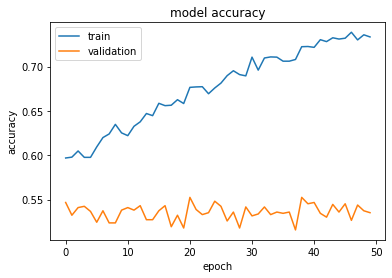

In [ ]:
#  "Accuracy"
plt.plot(model.history.history['<lambda>'])
plt.plot(model.history.history['val_<lambda>'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


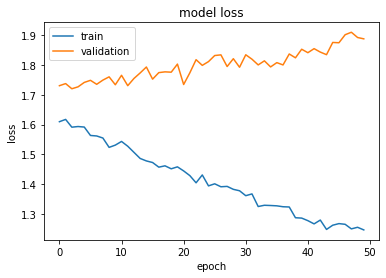

In [ ]:
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

44/44 - 1s - loss: 1.9195 - top_k_categorical_accuracy: 0.8640 - 661ms/epoch - 15ms/step
Loss: 1.919500708580017, Accuracy: 0.8640287518501282


## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [ ]:
# Save the model
model.save("emotion_cnn1D_k5_86.4.h5")

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("emotion_cnn1D_k5_86.4.h5")

In [ ]:
model

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [ ]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.919500708580017, Accuracy: 0.8640287518501282


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [ ]:
# Define default image size for our model
image_path = os.path.join("Images", "happy.jpeg")
image_size = (48, 48)

In [ ]:
from tensorflow.keras.preprocessing import image
im = image.load_img(image_path, target_size=image_size, color_mode="grayscale")
im

FileNotFoundError: ignored

In [ ]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(224, 224, 1)

In [ ]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 224*224)
img.shape

(1, 50176)

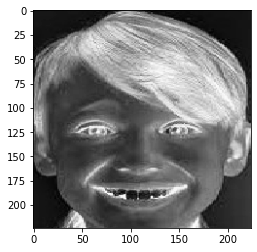

In [ ]:
plt.imshow(img.reshape(224, 224), cmap=plt.cm.Greys)

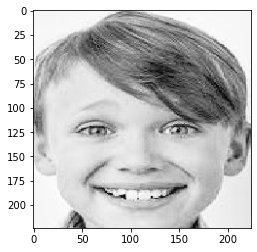

In [ ]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(224, 224), cmap=plt.cm.Greys)

In [ ]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(img).round()

1/1 [==============================] - 0s 45ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)